In [62]:
import sys
print(sys.executable)

d:\AI-ML\AIML\Scripts\python.exe


In [63]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Column  	Description
PassengerId	A unique ID for each passenger
Survived	Whether the passenger survived (1) or died (0)
Pclass  	Passenger class (1st, 2nd, or 3rd)
Name	    Full name of the passenger
Sex	Gender (male or female)
Age     	Age of the passenger
SibSp	    Number of siblings/spouses aboard the Titanic
Parch	    Number of parents/children aboard
Ticket	    Ticket number
Fare	    Ticket price
Cabin	    Cabin number (if available)
Embarked	Port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton)

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Did Gender Affect Survival?

In [66]:
survival_by_genders = titanic.groupby("Sex")["Survived"].mean()
print(survival_by_genders)

##woman has a more survival rate than a man

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


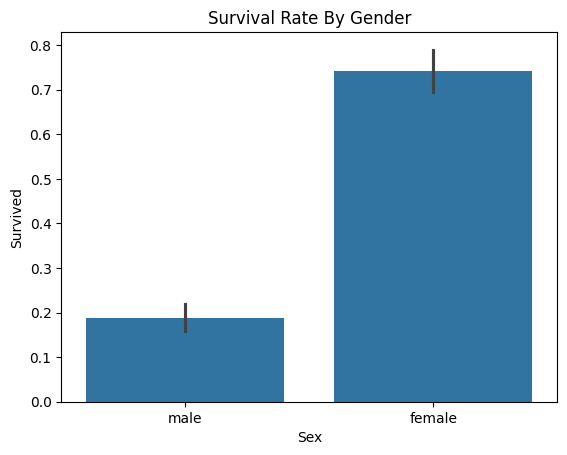

In [67]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.barplot(data=titanic, x="Sex", y="Survived")

plt.title("Survival Rate By Gender")
plt.show()

## survival rate by train class

In [68]:
titanic.groupby("Pclass")["Survived"].mean()

## class 1 > class 2 > class 3      ---   survivle rate.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

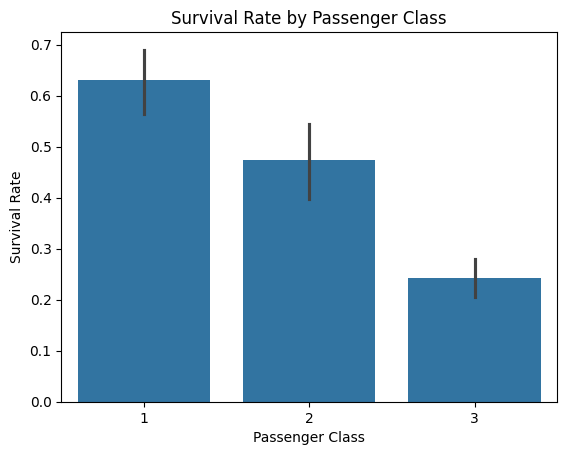

In [69]:
sns.barplot(data=titanic, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

## Combined Analysis class (Gender + Passenger Class)

In [70]:
titanic.groupby(["Pclass", "Sex"])["Survived"].mean()

# 1st class women had the highest survival rate
# 3rd class men had the lowest survival rate
# Class and gender together played a major role in survival

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

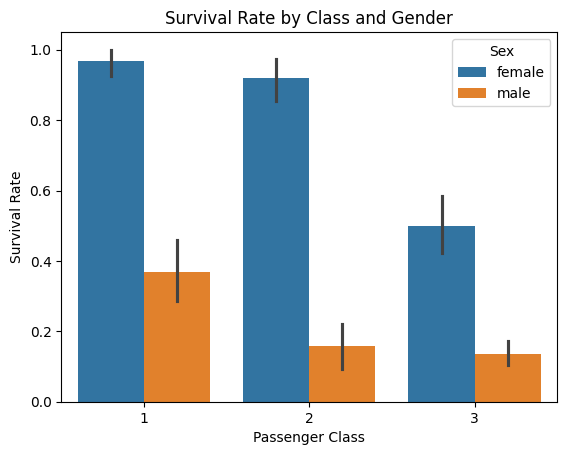

In [71]:
sns.barplot(data=titanic, x="Pclass", y="Survived", hue="Sex")

plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

## Did Age affect survival? Were younger passengers more likely to survive?

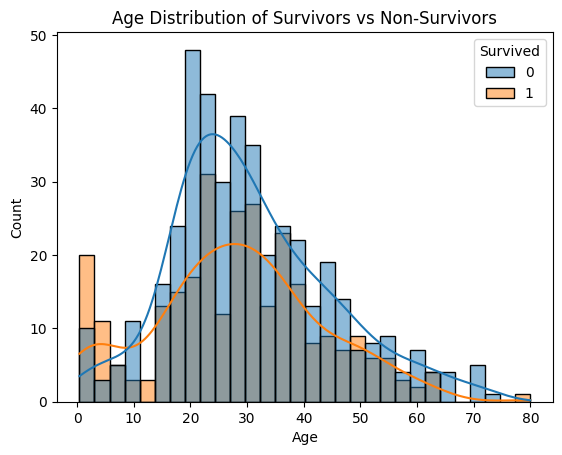

In [72]:
sns.histplot(data=titanic, x="Age", hue="Survived", bins=30, kde=True)

plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#younger age has more survival rate which are less than 10 years old.

In [73]:
titanic["AgeGroup"] = pd.cut(titanic["Age"], bins=[0, 10, 18, 30, 50, 80], labels=["0-10", "11-18", "19-30", "31-50", "51+"])

age_survival = titanic.groupby("AgeGroup", observed=True)["Survived"].mean()
print(age_survival)

AgeGroup
0-10     0.593750
11-18    0.426667
19-30    0.355556
31-50    0.423237
51+      0.343750
Name: Survived, dtype: float64


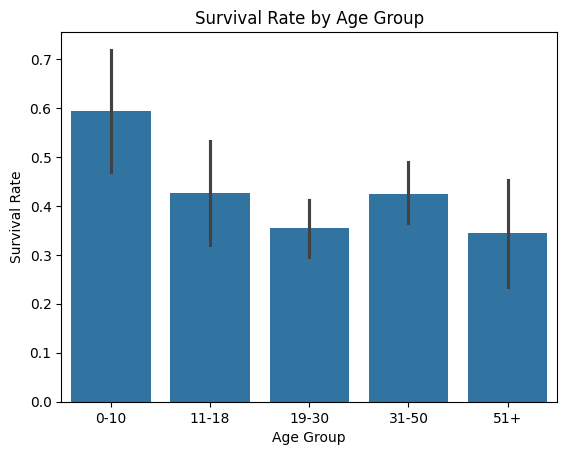

In [74]:
sns.barplot(data=titanic, x="AgeGroup", y="Survived")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

## Did Fare (Ticket Price) affect survival?

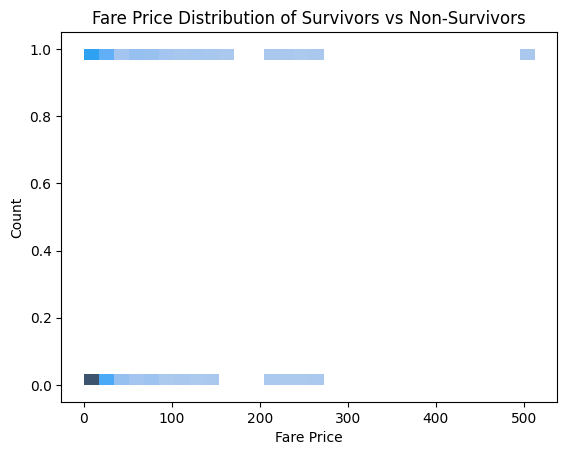

In [75]:
sns.histplot(data=titanic, x="Fare", y="Survived", bins=30, kde=True)
plt.title("Fare Price Distribution of Survivors vs Non-Survivors")
plt.xlabel("Fare Price")
plt.ylabel("Count")
plt.show()

In [76]:
titanic["FareGroup"] = pd.cut(titanic["Fare"], bins=[0, 25, 50, 100, 600], labels=["Low", "Medium", "High", "Very High"])

fare_survival = titanic.groupby("FareGroup", observed=True)["Survived"].mean()
print(fare_survival)

FareGroup
Low          0.293358
Medium       0.419540
High         0.654206
Very High    0.735849
Name: Survived, dtype: float64


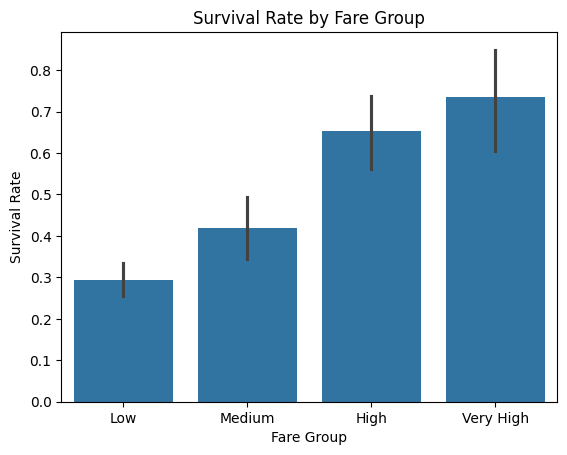

In [77]:
sns.barplot(data=titanic, x="FareGroup", y="Survived")

plt.title("Survival Rate by Fare Group")
plt.xlabel("Fare Group")
plt.ylabel("Survival Rate")
plt.show()

## Which feature (Age, Gender, Class, or Fare) was the STRONGEST predictor of survival?

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

titanic["Sex"] = LabelEncoder().fit_transform(titanic["Sex"])
titanic["Pclass"] = titanic["Pclass"].astype(int)
titanic = titanic.dropna(subset=["Age", "Fare"])

Features = ["Pclass", "Sex", "Age", "Fare"]
X = titanic[Features]
Y = titanic["Survived"]

model = LogisticRegression()
model.fit(X,Y)

importance = dict(zip(Features, model.coef_[0]))
print(importance)

{'Pclass': np.float64(-1.2208409584600617), 'Sex': np.float64(-2.406891323695409), 'Age': np.float64(-0.03579731159001111), 'Fare': np.float64(0.0008166569939226568)}


## Evaluate Model prediction - Logistic regression

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Features = ["Pclass", "Sex", "Age", "Fare"]
X = titanic[Features]
Y = titanic["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("classification report:\n", classification_report(y_test, y_pred))

print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.76
classification report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

confusion matrix:
 [[68 19]
 [16 40]]


In [80]:
## prediction using logistic regression

def predict_survival(pclass, sex, age, fare):
    sample_passanger = pd.DataFrame([[pclass, sex, age, fare]], columns=["Pclass", "Sex", "Age", "Fare"]) 
    prediction = model.predict(sample_passanger)

    if prediction[0] == 1:
        return "Survive :)"
    else:
        return "Not survive :("
    
result = predict_survival(2, 0, 25, 10)
print(result)

Survive :)
